In [2]:
import pandas as pd
schools = pd.read_csv('schools.csv')
schools

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7
...,...,...,...,...,...,...,...
370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6
371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5
372,Channel View School for Research,Queens,Q410,427,430,423,76.6
373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5


In [4]:
#Checking null data in columns
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


In [6]:
# Checking Statistics value of schools table
schools.describe()

,average_math,average_reading,average_writing,percent_tested
count,375.000000,375.000000,375.000000,355.000000
mean,432.944000,424.504000,418.458667,64.976338
std,71.952373,61.881069,64.548599,18.747634
min,317.000000,302.000000,284.000000,18.500000
25%,386.000000,386.000000,382.000000,50.950000
50%,415.000000,413.000000,403.000000,64.800000
75%,458.500000,445.000000,437.500000,79.600000
max,754.000000,697.000000,693.000000,100.000000


In [8]:
# fill median value of percent_tested in null data
schools['percent_tested']=schools['percent_tested'].fillna(schools['percent_tested'].median())
schools.info()                                                            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   375 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


In [10]:
# add columns in schools table
schools['total_scores']=schools['average_math']+schools['average_reading']+schools['average_writing']
schools['avg_scores']= schools['total_scores']/3
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_scores,avg_scores
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,64.8,1859,619.666667
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193,397.666667
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261,420.333333
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529,509.666667
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197,399.000000


### 1.What is the average for each subject area in New York City?

In [12]:
avg_scores =schools[['average_math','average_reading','average_writing']].mean()
avg_scores

average_math       432.944000
average_reading    424.504000
average_writing    418.458667
dtype: float64

### 2.What is the distribution of SAT scores (mean, median, and range) across all boroughs for each subject area (math, reading, writing)?

In [14]:
statistics_scores = schools[['average_math','average_reading','average_writing']].describe()
statistics_scores

,average_math,average_reading,average_writing
count,375.000000,375.000000,375.000000
mean,432.944000,424.504000,418.458667
std,71.952373,61.881069,64.548599
min,317.000000,302.000000,284.000000
25%,386.000000,386.000000,382.000000
50%,415.000000,413.000000,403.000000
75%,458.500000,445.000000,437.500000
max,754.000000,697.000000,693.000000


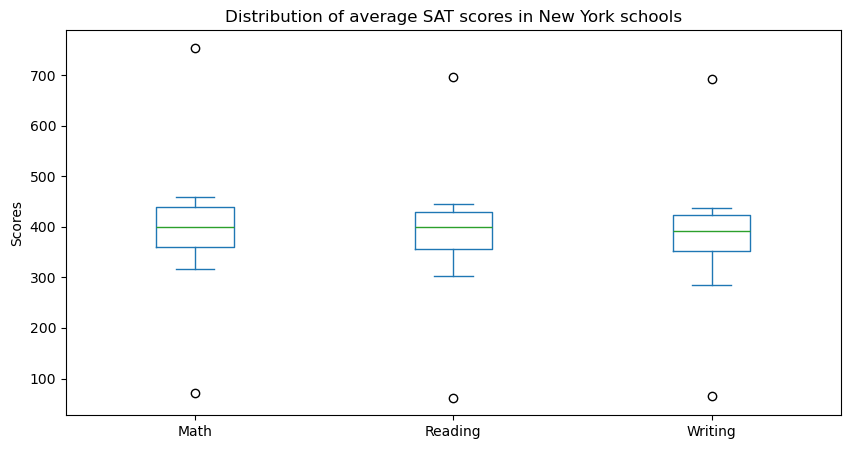

In [16]:
import matplotlib.pyplot as plt
statistics_scores.plot(kind='box',figsize=(10,5))
plt.title('Distribution of average SAT scores in New York schools')
plt.xticks(ticks=[1,2,3],labels=['Math','Reading','Writing'])
plt.ylabel('Scores')
plt.show()


### 3.How many schools fall into the high-performance category (defined as schools with an average SAT score above 80% of the maximum possible score, i.e., above 640 in each subject)?

In [18]:
# Avg SAT score: 800 * 80% = 640
high_performance = schools[schools['avg_scores']>640]
high_performance

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_scores,avg_scores
88,Stuyvesant High School,Manhattan,M477,754,697,693,97.4,2144,714.666667
93,Staten Island Technical High School,Staten Island,R440,711,660,670,99.7,2041,680.333333
170,Bronx High School of Science,Bronx,X445,714,660,667,97.0,2041,680.333333
174,High School of American Studies at Lehman College,Bronx,X905,669,672,672,91.8,2013,671.000000
333,Townsend Harris High School,Queens,Q515,680,640,661,97.1,1981,660.333333
365,Queens High School for the Sciences at York Co...,Queens,Q774,701,621,625,97.9,1947,649.000000


In [20]:
high_performance_math = schools[schools['average_math']>640]
number_schools_high_performance_math = high_performance_math.shape[0]
number_schools_high_performance_math

10

In [22]:
high_performance_reading = schools[schools['average_reading']>640]
number_schools_high_performance_reading = high_performance_reading.shape[0]
number_schools_high_performance_reading

5

In [24]:
high_performance_writing = schools[schools['average_writing']>640]
number_schools_high_performance_writing = high_performance_writing.shape[0]
number_schools_high_performance_writing

5

### 4.What is the average percent tested, and how does it correlate with average SAT scores across math, reading, and writing?

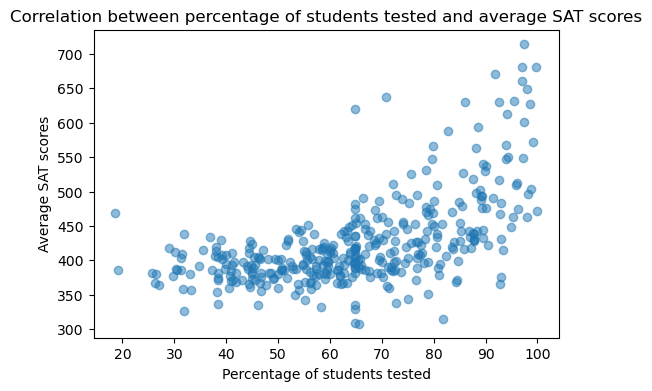

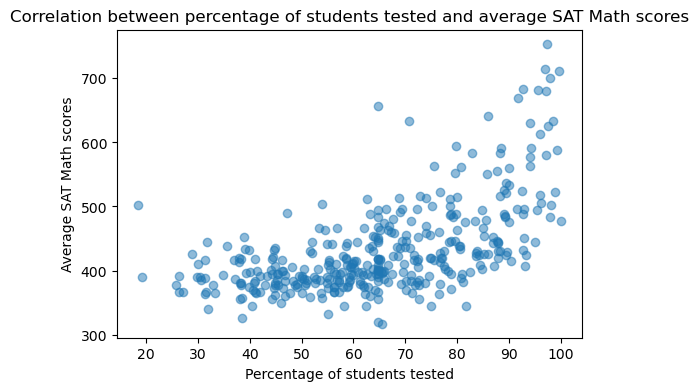

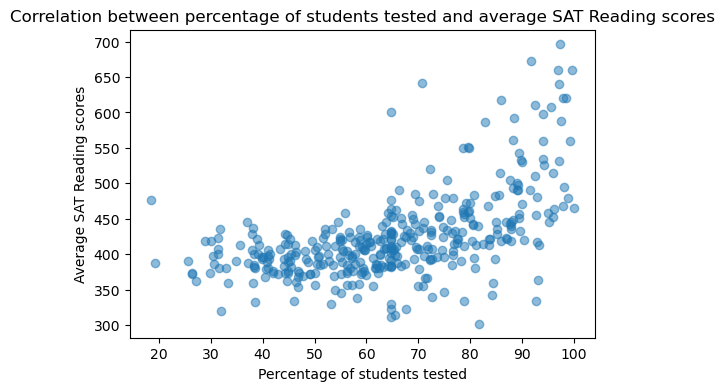

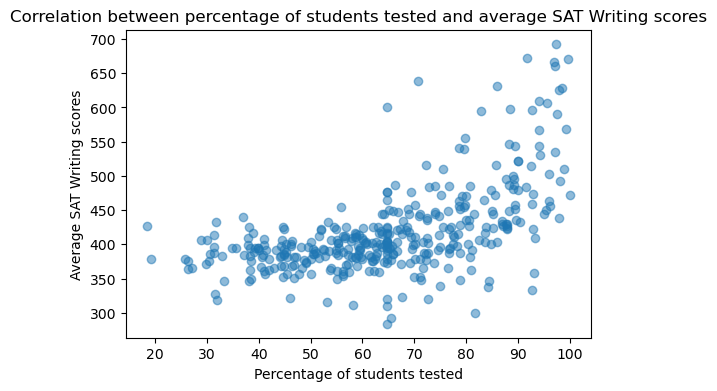

In [26]:
average_percent_tested= schools['percent_tested'].mean()
plt.figure(figsize=(6,4))
plt.plot(schools['percent_tested'],schools['avg_scores'],'o',alpha=0.5)
plt.xlabel('Percentage of students tested')
plt.ylabel('Average SAT scores')
plt.title('Correlation between percentage of students tested and average SAT scores') 
plt.show()

average_percent_tested= schools['percent_tested'].mean()
plt.figure(figsize=(6,4))
plt.plot(schools['percent_tested'],schools['average_math'],'o',alpha=0.5)
plt.xlabel('Percentage of students tested')
plt.ylabel('Average SAT Math scores')
plt.title('Correlation between percentage of students tested and average SAT Math scores')
plt.show()


average_percent_tested= schools['percent_tested'].mean()
plt.figure(figsize=(6,4))
plt.plot(schools['percent_tested'],schools['average_reading'],'o',alpha=0.5)
plt.xlabel('Percentage of students tested')
plt.ylabel('Average SAT Reading scores')
plt.title('Correlation between percentage of students tested and average SAT Reading scores')
plt.show()


average_percent_tested= schools['percent_tested'].mean()
plt.figure(figsize=(6,4))
plt.plot(schools['percent_tested'],schools['average_writing'],'o',alpha=0.5)
plt.xlabel('Percentage of students tested')
plt.ylabel('Average SAT Writing scores')
plt.title('Correlation between percentage of students tested and average SAT Writing scores')
plt.show()

### 5.Are there significant differences in the percent tested among schools categorized by their performance levels (high-perforamnce, low-performance)?

In [56]:
schools['high_low_performance']=schools['avg_scores']>640
schools.sort_values(by='avg_scores',ascending=False).head(10)

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_scores,avg_scores,high_low_performance
88,Stuyvesant High School,Manhattan,M477,754,697,693,97.4,2144,714.666667,True
170,Bronx High School of Science,Bronx,X445,714,660,667,97.0,2041,680.333333,True
93,Staten Island Technical High School,Staten Island,R440,711,660,670,99.7,2041,680.333333,True
174,High School of American Studies at Lehman College,Bronx,X905,669,672,672,91.8,2013,671.000000,True
333,Townsend Harris High School,Queens,Q515,680,640,661,97.1,1981,660.333333,True
365,Queens High School for the Sciences at York Co...,Queens,Q774,701,621,625,97.9,1947,649.000000,True
5,Bard High School Early College,Manhattan,M097,634,641,639,70.8,1914,638.000000,False
280,Brooklyn Technical High School,Brooklyn,K430,682,608,606,95.5,1896,632.000000,False
45,Eleanor Roosevelt High School,Manhattan,M855,641,617,631,86.0,1889,629.666667,False
68,"High School for Mathematics, Science, and Engi...",Manhattan,M812,683,610,596,92.6,1889,629.666667,False


In [58]:
schools_high_low_performance = schools.groupby('high_low_performance')['percent_tested'].mean()
schools_high_low_performance 

high_low_performance
False    64.449051
True     96.816667
Name: percent_tested, dtype: float64

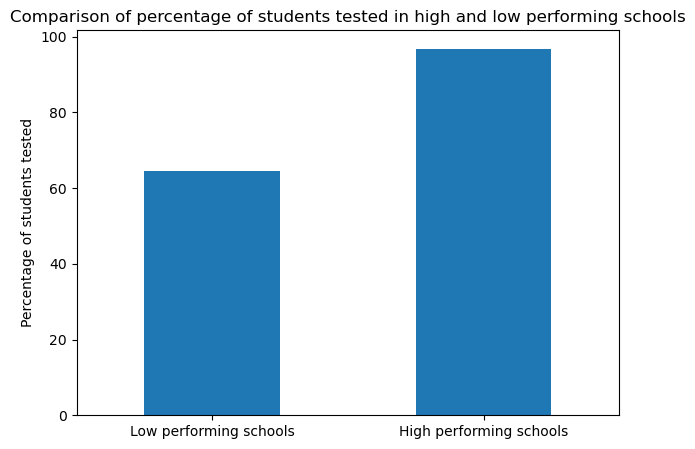

In [513]:
schools_high_low_performance.plot(kind='bar',figsize=(7,5))
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=['Low performing schools', 'High performing schools'], rotation=0)
plt.title('Comparison of percentage of students tested in high and low performing schools')
plt.ylabel('Percentage of students tested')
plt.show()

### 6.Which borough has the highest average SAT scores in each subject area?

In [60]:
avg_scores_borough = schools.groupby('borough')[['average_math','average_reading','average_writing','avg_scores','percent_tested']].mean()
avg_scores_borough= avg_scores_borough.sort_values(by='avg_scores',ascending=False).round(2)
avg_scores_borough

,average_math,average_reading,average_writing,avg_scores,percent_tested
borough,,,,,
Staten Island,486.20,478.50,474.30,479.67,65.98
Queens,462.36,443.26,439.86,448.49,69.05
Manhattan,455.89,444.93,439.31,446.71,71.02
Brooklyn,416.40,410.76,403.09,410.09,62.74
Bronx,404.36,402.52,395.85,400.91,58.97


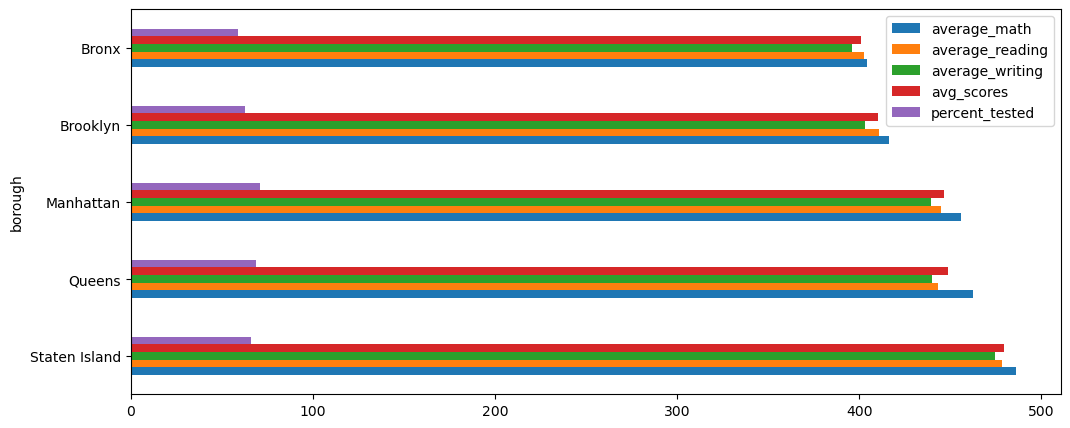

In [62]:
avg_scores_borough.plot(kind='barh',figsize=(12,5))
plt.show()

### 7.What are the top-performing and lowest-performing schools in each borough based on SAT scores?

In [65]:
top_low_schools_borough_Manhattan = schools[schools['borough']=='Manhattan'][['school_name','borough','total_scores']].sort_values(by='total_scores',ascending=False)
top_low_schools_borough_Manhattan = top_low_schools_borough_Manhattan.sort_values(by='total_scores',ascending=False)
top_low_schools_borough_Manhattan

,school_name,borough,total_scores
88,Stuyvesant High School,Manhattan,2144
5,Bard High School Early College,Manhattan,1914
68,"High School for Mathematics, Science, and Engi...",Manhattan,1889
45,Eleanor Roosevelt High School,Manhattan,1889
0,"New Explorations into Science, Technology and ...",Manhattan,1859
...,...,...,...
70,Gregorio Luperon High School for Science and M...,Manhattan,1090
73,Coalition School for Social Change,Manhattan,1079
59,Academy for Social Action (College Board),Manhattan,1071
13,International High School at Union Square,Manhattan,1049


In [67]:
top_low_schools_borough_StatenIsland = schools[schools['borough']=='Staten Island'][['school_name','borough','total_scores']]
top_low_schools_borough_StatenIsland = top_low_schools_borough_StatenIsland.sort_values(by='total_scores',ascending=False)
top_low_schools_borough_StatenIsland

,school_name,borough,total_scores
93,Staten Island Technical High School,Staten Island,2041
96,Susan E. Wagner High School,Staten Island,1473
95,Tottenville High School,Staten Island,1446
90,Michael J. Petrides School,Staten Island,1426
98,CSI High School for International Studies,Staten Island,1409
91,Curtis High School,Staten Island,1355
97,Gaynor McCown Expeditionary Learning School,Staten Island,1354
94,New Dorp High School,Staten Island,1344
92,Port Richmond High School,Staten Island,1284
89,Ralph R. McKee Career and Technical Education ...,Staten Island,1258


In [69]:
top_low_schools_borough_Bronx = schools[schools['borough']=='Bronx'][['school_name','borough','total_scores']]
top_low_schools_borough_Bronx = top_low_schools_borough_Bronx.sort_values(by='total_scores',ascending=False)
top_low_schools_borough_Bronx

,school_name,borough,total_scores
170,Bronx High School of Science,Bronx,2041
174,High School of American Studies at Lehman College,Bronx,2013
116,Bronx Center for Science and Mathematics,Bronx,1466
159,Riverdale/Kingsbridge Academy,Bronx,1457
180,Collegiate Institute for Math and Science,Bronx,1407
...,...,...,...
179,High School of Language and Innovation,Bronx,1016
114,Bronx International High School,Bronx,1005
109,International Community High School,Bronx,995
171,Kingsbridge International High School,Bronx,987


In [71]:
top_low_schools_borough_Queens = schools[schools['borough']=='Queens'][['school_name','borough','total_scores']]
top_low_schools_borough_Queens = top_low_schools_borough_Queens.sort_values(by='total_scores',ascending=False)
top_low_schools_borough_Queens

,school_name,borough,total_scores
333,Townsend Harris High School,Queens,1981
365,Queens High School for the Sciences at York Co...,Queens,1947
213,Baccalaureate School for Global Education,Queens,1881
204,Bard High School Early College Queens,Queens,1839
374,Scholars' Academy,Queens,1716
...,...,...,...
325,Flushing International High School,Queens,1127
371,Rockaway Park High School for Environmental Su...,Queens,1114
367,August Martin High School,Queens,1102
370,"Queens High School for Information, Research, ...",Queens,1086


In [73]:
top_low_schools_borough_Brooklyn = schools[schools['borough']=='Brooklyn'][['school_name','borough','total_scores']]
top_low_schools_borough_Brooklyn = top_low_schools_borough_Brooklyn.sort_values(by='total_scores',ascending=False)
top_low_schools_borough_Brooklyn

,school_name,borough,total_scores
280,Brooklyn Technical High School,Brooklyn,1896
237,Brooklyn Latin School,Brooklyn,1804
275,Millennium Brooklyn High School,Brooklyn,1643
308,Leon M. Goldstein High School for the Sciences,Brooklyn,1640
254,Midwood High School,Brooklyn,1580
...,...,...,...
236,Juan Morel Campos Secondary School,Brooklyn,1075
234,Dr. Susan S. McKinney Secondary School of the ...,Brooklyn,1028
242,W. H. Maxwell Career and Technical Education H...,Brooklyn,1009
295,International High School at Prospect Heights,Brooklyn,946


### 8.How does the variability of SAT scores (standard deviation) differ across boroughs for each subject area?

In [76]:
avg_scores_borough = schools.groupby('borough')[['average_math','average_reading','average_writing','avg_scores']].std()
avg_scores_borough= avg_scores_borough.sort_values(by='avg_scores',ascending=False).round(2)
avg_scores_borough= avg_scores_borough.rename(columns={'average_math':'std_Math','average_reading':'std_Reading','average_writing':'std_Writing','avg_scores':'std_scores'})
avg_scores_borough

,std_Math,std_Reading,std_Writing,std_scores
borough,,,,
Manhattan,83.82,73.93,76.39,76.76
Staten Island,83.13,66.85,72.67,74.10
Queens,71.89,61.71,66.23,65.08
Brooklyn,60.48,48.91,49.66,51.62
Bronx,52.22,49.22,51.30,50.13


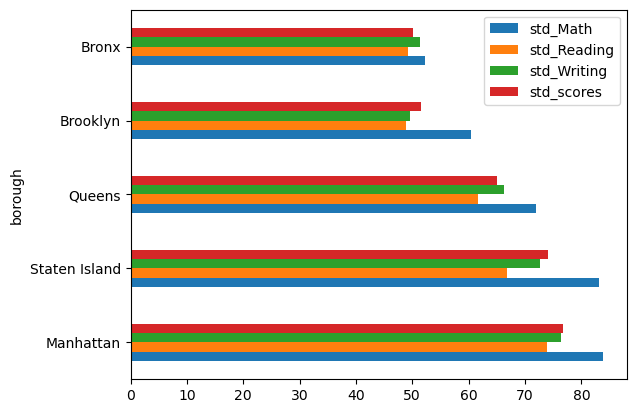

In [78]:
avg_scores_borough.plot(kind='barh')
plt.show()

### 9.Is there a correlation between the percent tested and average SAT scores at the borough level, and does this vary across boroughs?

In [81]:
borough_level_corr = schools.groupby('borough')[['avg_scores','percent_tested']].corr()
borough_level_corr 

avg_scores  percent_tested
borough                                                 
Bronx         avg_scores        1.000000        0.396394
              percent_tested    0.396394        1.000000
Brooklyn      avg_scores        1.000000        0.527624
              percent_tested    0.527624        1.000000
Manhattan     avg_scores        1.000000        0.598837
              percent_tested    0.598837        1.000000
Queens        avg_scores        1.000000        0.716747
              percent_tested    0.716747        1.000000
Staten Island avg_scores        1.000000        0.803500
              percent_tested    0.803500        1.000000

### 10.How do schools categorized as high-performing compare to those categorized as low-performing in terms of the average percent tested in each borough?

In [84]:
schools_high_low_performing = schools.groupby(['high_low_performance','borough']).agg({'percent_tested':'mean'})
schools_high_low_performing

percent_tested
high_low_performance borough                      
False                Bronx               58.229167
                     Brooklyn            62.739450
                     Manhattan           70.720455
                     Queens              68.202985
                     Staten Island       62.233333
True                 Bronx               94.400000
                     Manhattan           97.400000
                     Queens              97.500000
                     Staten Island       99.700000

<Axes: ylabel='high_low_performance,borough'>

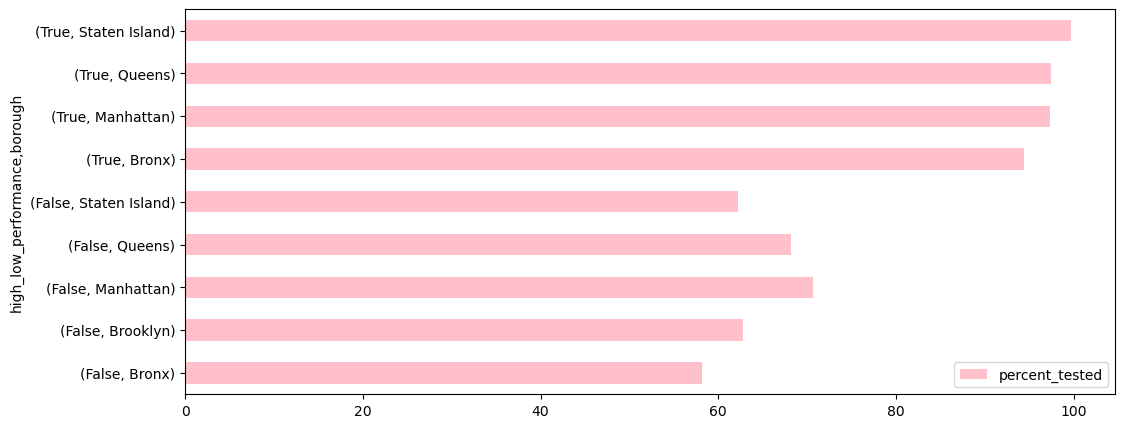

In [86]:
schools_high_low_performing.plot(kind='barh',figsize=(12,5),color='pink')